### Study session 9 - simply bioinformatics
#### Use data and control structures, pandas, dataframes and explaore new libraries
#### Explore object  attributes and methods
#### BIOINF 575 - Fall 2021



____

#### Variant data exploration   
We have variant data for a sample in the file `variant_data_file.vcf`.   
The vcf data file contains information about differences found in the genome of a specific sample when compared to the reference.    
The file contains approximatelly 1000 differences found in the Y chromosome.





..................................................................................................

<b><font color = "red">Exercise</font> <br></b>

<b>Total depth distribution</b>

We want to have a look at the distribution of the total depth in our data (DP key in the INFO column).
- Read the data into a pandas data frame
    - look at the comment and names arguments for the read_csv funtion in the pandas library, you will need to add the header by hand
- Write a function that selects the total depth from the INFO part of a variant (row in our dataframe)
- Apply the function for each row of the dataframe which will result in a pandas series with the total depth for each variant 
- Plot the histogram of total depths (pandas series previously computed)
- Plot the histogram of the total depths that are less than 170

In [ ]:
# Write your solution here




In [2]:
# import necessary libraries

import numpy as np
import pandas as pd

In [3]:
# read the data from the vcf file  and add header (column labels)
# pd.read_csv function has a names argument that allows us to set the column labels

columns = ("CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO")
vcf_data = pd.read_csv("variant_data_file.vcf", comment = "#", sep = "\t", names = columns)
vcf_data

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO
0,Y,2728456,rs2058276,T,C,32,.,AC=2;AN=2;DB;DP=182;H2;NS=65
1,Y,2734240,.,G,A,31,.,AC=1;AN=2;DP=196;NS=63
2,Y,2743242,.,C,T,25,.,AC=1;AN=2;DP=275;NS=66
3,Y,2746727,.,A,G,34,.,AC=2;AN=2;DP=179;NS=64
4,Y,2777970,.,T,A,67,.,AC=1;AN=2;DP=225;NS=67
...,...,...,...,...,...,...,...,...
954,Y,27108406,rs2049642,G,A,30,.,AC=1;AN=2;DB;DP=163;NS=61
955,Y,27141305,rs9786602,C,A,29,.,AC=2;AN=2;DB;DP=163;NS=63
956,Y,27142489,rs1358368,G,C,37,.,AC=2;AN=2;DB;DP=195;H2;NS=61
957,Y,27182557,.,G,A,22,.,AC=1;AN=2;DP=168;NS=62


In [5]:
# Write a function that return the value for the DP key
# from the INFO part of a variant data row/line 
# The info key=value pairs are separated by ";"
# There might be flag values, that do not have a value
# In that case there is no = in the pair data e.g.: ;DB;

def get_dp(info):
    '''
    Function that returns the total depth value for a variant from the variant information
    Args:
    info (str): the INFO column/element for a variant/data line from a vcf file
    Returns:
    int: the total depth value. for the variant, the value for DP key
    '''
    dp = np.nan
    for pair in info.split(";"):
        if "=" in pair:
            key, val = pair.split("=")
            if key == "DP":
                return int(val)
    return dp

In [6]:
# test the function
get_dp("AC=2;AN=2;DB;DP=182;H2;NS=65")

182

In [7]:
# Use the apply method for a pandas Series (dataframe column)
# to call the funtion for each element in the Series/column
# and collect the result in the resulting Series 
# the resulting series has the same name as the one the function was applied on

dp_data = vcf_data.INFO.apply(get_dp)
dp_data


0      182
1      196
2      275
3      179
4      225
      ... 
954    163
955    163
956    195
957    168
958    317
Name: INFO, Length: 959, dtype: int64

<AxesSubplot:>

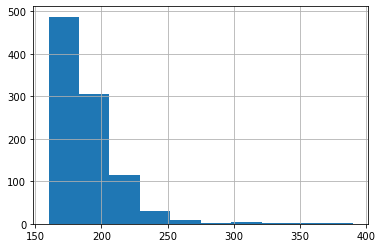

In [8]:
# plot the histogram for a pandas Series using the hist method
# we see a very steep decrese in frequency as the total depth values increase

dp_data.hist()

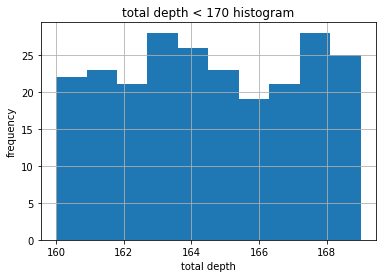

In [25]:
# select only the total depth vaues < 170 using conitional subsetting on the pandas series
# the resulting data structure is still a pandas Series so we can plot the histogram
# usingthe hist method
# we see a close to uniform distribution for depth values < 170
# I also added here a couple of ways we can customize the histogram

hist_plt = dp_data[dp_data<170].hist()
# dir(hist_plt)
hist_plt.set_xlabel("total depth")
hist_plt.set_ylabel("frequency")
title_obj = hist_plt.set_title("total depth < 170 histogram")




..................................................................................................

<b><font color = "red">Exercise</font> <br></b>


<b>Quality and SNP distribution</b> 

<b>A.</b> Display the distribution of the quality scores for the variants. 
- Select the QUAL column from the data and plot the histogram

<b>B.</b> Compute the frequency (number of occurences) of each of the REF ALT combinations available in the dataset and make a bar plot.    
Then, identify the most frequent combination of REF ALT in the dataframe 
- Compute the number of occurences for REF ALT combinations. 
    - Make use of the .value_counts() method for a dataframe to count the number for the unique combinations of row elements.
- The result of value_counts is a pandas series, plot the values using a barplot.
- Select from the series the maximum value together with the associated label: e.g. A T 300

In [ ]:
# Write your solution here




<AxesSubplot:>

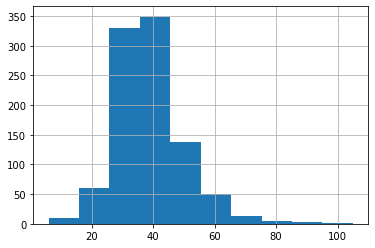

In [26]:
# A. Display the distribution of the quality scores for the variants.
# Select the QUAL column from the data and plot the histogram

vcf_data.QUAL.hist()

In [27]:
# B. Compute the frequency (number of occurences) of each of the REF ALT 
# combinations available in the dataset and make a bar plot.
# Then, identify the most frequent combination of REF ALT in the dataframe

# Compute the number of occurences for REF ALT combinations.
# Make use of the .value_counts() method for a dataframe 
# to count the number for the unique combinations of row elements.


REF_ALT_counts = vcf_data.loc[:,("REF","ALT")].value_counts()
REF_ALT_counts

REF  ALT
C    T      175
G    A      163
A    G      155
T    C      124
C    A       56
G    T       53
C    G       49
G    C       46
T    G       43
     A       35
A    C       34
     T       26
dtype: int64

In [28]:
# we have a series, the row labels look like two columns but they are just row labels
type(REF_ALT_counts)

pandas.core.series.Series

In [29]:
REF_ALT_counts.index

MultiIndex([('C', 'T'),
            ('G', 'A'),
            ('A', 'G'),
            ('T', 'C'),
            ('C', 'A'),
            ('G', 'T'),
            ('C', 'G'),
            ('G', 'C'),
            ('T', 'G'),
            ('T', 'A'),
            ('A', 'C'),
            ('A', 'T')],
           names=['REF', 'ALT'])

<AxesSubplot:xlabel='REF,ALT'>

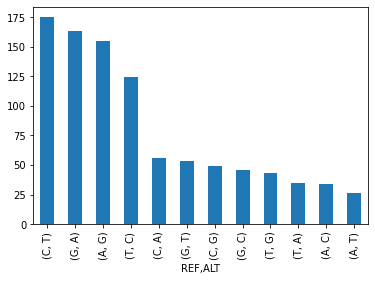

In [30]:
# plot a bar plot with a bar for each value in the series

REF_ALT_counts.plot(kind = "bar")

In [11]:
# Select from the series the maximum value together with the associated label: e.g. A T 300
# get the label and the value from the series where the value is the maximum value
# conitional subsetting

REF_ALT_counts[REF_ALT_counts == max(REF_ALT_counts)]

REF  ALT
C    T      175
dtype: int64

In [32]:
# the data is sorted, descending, so take the first element, to add the label you need a range:

REF_ALT_counts[0:1]

REF  ALT
C    T      175
dtype: int64

In [33]:
REF_ALT_counts[0]

175

____
____


#### Read alignment analysis   
We have the genome data/sequence for an organism and the sequence alingnment data for a (biological) sample from that organism.   
We want to count how many reads align at each position in the genome.  
This computation could be expanded further into the computation for creating a vcf file. 






_____

<b><font color = "red">Exercise</font> <br></b>

<b>Initialize the genome counts list</b>   

Read the data from the the fasta file `test_genome.fa` and create/initialize a list for the genome.     
Create a list where we have the value 0 for each position/nucleotide in the genome.


In [1]:
# Write your solution here



In [1]:
# open the file and read the information line by line
# where we have nucleotides ( ACGT or N = any) 
# we add a 0 in the genome positions list
# because we do not have any reads aligning there yet

with open("genome.fa") as genome_file:
    for line in genome_file:
        print(line)
        break # stop to see what we have on the first line
    

>I dna_rm:chromosome chromosome:R64-1-1:I:1:230218:1 REF



In [2]:
# the first line has some genime information and 
# no nucleotides so I can ignore it
# either read it and move on
# or check for lines that do not start with >


with open("genome.fa") as genome_file:
    genome_file.readline() # read and ignore the first line
    for line in genome_file:
        print(line)
        break # stop to see what we have on the first line of nucleotides


NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN



In [5]:
# or check for lines that do not start with >

with open("genome.fa") as genome_file:
    for line in genome_file:
        if not line.startswith(">"):
            print(line)
            break # stop to see what we have on the first line of nucleotides



NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN



In [6]:
# create empty list of positions
genome_pos = [] 
with open("genome.fa") as genome_file:
    # read and ignore the first line because it does not have nucleotides
    genome_file.readline()
    for line in genome_file:
        # go through each nucleotide one at a time, 
        # strip new line at the end of the line
        for nc in line.strip():
            # add a 0 for each nucleotide
            genome_pos.append(0)
        # stop to see what we have on the first line of nucleotides
        # break 

In [9]:
print("list/genome size:" , len(genome_pos))
print(genome_pos[:150])

list/genome size: 230218
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


___

<b> <font color = "red">Exercise</font></b>

<b>Count the number of reads that align at each position in the genome.</b>    

Read the data from the alignment file `sample.bam` using the bamnostic library.  
##### To install the bamnostic package follow the instruction from the package github repository.
https://github.com/betteridiot/bamnostic

Go through each read and update the count in the list initialized in the previous exercise.   
To update the count, add up 1 in the counts for each position the read covers.   
The positions the read covers start with the read position and end with the read position + the length of the read sequence.       
Consecutive nucleotides in the read algn to consecutive positions in the genome.   


In [ ]:
# Write your solution here




#### To install the bamnostic package open a terminal and run:
```bash
pip install bamnostic
```
##### It is one of the install options provided in the documentation

https://github.com/betteridiot/bamnostic

If it does not work try another option

There are 4 methods of installation available (choose one):

Option 1: Through the conda package manager (Anaconda Cloud)

```bash
# first, add the conda-forge channel to your conda build
conda config --add channels conda-forge

# now bamnostic is available for install
conda install bamnostic
```

In [11]:
# import the library 
import bamnostic as bs



In [12]:
# Loading your BAM file (Note: CRAM format are not supported at this time)
# Bamnostic comes with an example BAM (and respective BAI) file just to play around with the output. 
# This example file is made availble through bamnostic.example_bam, which is a just a string path to the BAM file within the package.

bam = bs.AlignmentFile(bs.example_bam, 'rb')

# the result of the AlignmentFile function is a generator that gives us the aligned reads from the bam file one by one.
first_read = next(bam)
first_read

EAS56_57:6:190:289:82	69	chr1	100	0	*	=	100	0	CTCAAGGTTGTTGCAAGGGGGTCTATGTGAACAAA	<<<7<<<;<<<<<<<<8;;<7;4<;<;;;;;94<;	MF:C:192

In [13]:
# dir(first_read)

In [14]:
# the read sequence
first_read.seq

'CTCAAGGTTGTTGCAAGGGGGTCTATGTGAACAAA'

In [15]:
# the position where the read aligned
# 0-based position, in the file we have 1-based positions 
# but for ease of preocessing they are set to 0-based in the read object

first_read.pos

99

In [16]:
print(first_read.pos)

99


In [17]:
# use a for loop to go through the first 10 reads
# use a counter and break to stop after 10 reads
# start from the beginning - recreate the generator

bam = bs.AlignmentFile(bs.example_bam, 'rb')
no_reads = 0
for read in bam:
    no_reads += 1 # printing another read so increase the number
    print(read.seq, read.pos)
    if no_reads >= 10: # when you reached 10 reads
        break # exit the loop
    
# bam.close()

CTCAAGGTTGTTGCAAGGGGGTCTATGTGAACAAA 99
AGGGGTGCAGAGCCGAGTCACGGGGTTGCCAGCAC 99
GGTGCAGAGCCGAGTCACGGGGTTGCCAGCACAGG 102
AGCCGAGTCACGGGGTTGCCAGCACAGGGGCTTAA 109
CCGAGTCACGGGGTTGCCAGCACAGGGGCTTAACC 111
GTTCTCAAGGTTGTTGCAAGGGGGTCTATGTGAAC 112
CGAGTCACGGGGTTGCCAGCACAGGGGCTTAACCT 112
GTTCTCAAGGTTGTTGCAAGGGGGTCTATGTGAAC 118
ACGGGGTTGCCAGCACAGGGGCTTAACCTCTGGTG 118
GGGGTTGCCAGCACAGGGGCTTAACCTCTGGTGAC 120


In [18]:
# getting the next read because we did not close the file
next(bam)

EAS192_3:1:225:195:543	99	chr1	123	99	35M	=	299	211	GGTTGCCAGCACAGGGGCTTAACCTCTGGTGACTG	<<<<<<<<<<<<<<<<<<<<<<<9<<;::388998	Aq:C:72	H0:C:1	H1:C:0	MF:C:18	NM:C:0	UQ:C:0

In [19]:
# Another option, using the with control structure so we close the file

with bs.AlignmentFile(bs.example_bam, 'rb') as bam:
    no_reads = 0
    for read in bam:
        no_reads += 1 # printing another read so increase the number
        print(read.seq, read.pos)
        if no_reads >= 10: # when you reached 10 reads
            break # exit the loop

CTCAAGGTTGTTGCAAGGGGGTCTATGTGAACAAA 99
AGGGGTGCAGAGCCGAGTCACGGGGTTGCCAGCAC 99
GGTGCAGAGCCGAGTCACGGGGTTGCCAGCACAGG 102
AGCCGAGTCACGGGGTTGCCAGCACAGGGGCTTAA 109
CCGAGTCACGGGGTTGCCAGCACAGGGGCTTAACC 111
GTTCTCAAGGTTGTTGCAAGGGGGTCTATGTGAAC 112
CGAGTCACGGGGTTGCCAGCACAGGGGCTTAACCT 112
GTTCTCAAGGTTGTTGCAAGGGGGTCTATGTGAAC 118
ACGGGGTTGCCAGCACAGGGGCTTAACCTCTGGTG 118
GGGGTTGCCAGCACAGGGGCTTAACCTCTGGTGAC 120


In [20]:
next(bam)

TypeError: object of type 'NoneType' has no len()

```
# lets align to a genome of. size 10 a read of 3 nucleotides starting at pos (0-based) 4:
read.seq ACT
read.pos 4
genome_pos  0 0 0 0 0 0 0 0 0 0    # number of reads that align at. each position

____
read      :         A C T
genome_pos: 0 0 0 0 1 1 1 0 0 0 0 
index     : 0 1 2 3 4 5 6 7 8 9 10
_____________

# lets align to a genome of size 10 another read of 3 nucleotides starting at pos (0-based) 5:
read.seq CAC
read.pos 5
____
read      :         A C T
read1     :           C A C
genome_pos: 0 0 0 0 1 2 2 1 0 0 0
index     : 0 1 2 3 4 5 6 7 8 9 10
```

In [21]:
print(genome_pos[:50])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [29]:
# now let's do that with some code
# aligning 1 read

with bs.AlignmentFile(bs.example_bam, 'rb') as bam:
    no_reads = 0
    for read in bam:
        # printing another read so increase the number
        no_reads += 1 
        # print(read.seq, read.pos)
        # we need to increase the values in the list at indices 
        # starting with read.pos and ending after we went through 
        # each nucleotide in the read sequence
        for position in range(read.pos, read.pos + len(read.seq)):
            genome_pos[position] += 1
         # when you reached 1 read
        if no_reads >= 1:
            # exit the loop
            break 
            
print(genome_pos[80:170])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [31]:
# reset the genome_positions to start over
# create empty list of positions
genome_pos = [] 
with open("genome.fa") as genome_file:
    # read and ignore the first line because it does not have nucleotides
    genome_file.readline()
    for line in genome_file:
        # go through each nucleotide one at a time, 
        # strip new line at the end of the line
        for nc in line.strip():
            # add a 0 for each nucleotide
            genome_pos.append(0)
        # stop to see what we have on the first line of nucleotides
        # break 

In [34]:
print(genome_pos[:170])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [35]:
# align 10 reads
with bs.AlignmentFile(bs.example_bam, 'rb') as bam:
    no_reads = 0
    for read in bam:
        # printing another read so increase the number
        no_reads += 1 
        # print(read.seq, read.pos)
        # we need to increase the values in the list at indices 
        # starting with read.pos and ending after we went through 
        # each nucleotide in the read sequence
        for position in range(read.pos, read.pos + len(read.seq)):
            genome_pos[position] += 1
         # when you reached 10 reads
        if no_reads >= 10:
            # exit the loop
            break 

In [36]:
print(genome_pos[80:170])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 7, 7, 7, 7, 7, 7, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [39]:
# align all reads

# reset the genome_positions to start over
# create empty list of positions
genome_pos = [] 
with open("genome.fa") as genome_file:
    # read and ignore the first line because it does not have nucleotides
    genome_file.readline()
    for line in genome_file:
        # go through each nucleotide one at a time, 
        # strip new line at the end of the line
        for nc in line.strip():
            # add a 0 for each nucleotide
            genome_pos.append(0)
        # stop to see what we have on the first line of nucleotides
        # break 

# count the reads that align using all reads in the file
# no need to keep count of the number of reads
with bs.AlignmentFile(bs.example_bam, 'rb') as bam:
    for read in bam:
        # we need to increase the values in the list at indices 
        # starting with read.pos and ending after we went through 
        # each nucleotide in the read sequence
        for position in range(read.pos, read.pos + len(read.seq)):
            genome_pos[position] += 1

            
# check to see our genome position list
# how many reads aligned at each position
print(genome_pos[:300])

[3, 4, 4, 4, 5, 8, 12, 14, 14, 14, 15, 16, 16, 16, 16, 17, 18, 19, 19, 19, 19, 19, 19, 20, 21, 22, 22, 22, 22, 23, 23, 23, 24, 25, 25, 23, 23, 23, 24, 24, 23, 20, 20, 21, 23, 24, 24, 25, 25, 27, 26, 26, 25, 26, 26, 27, 29, 30, 29, 28, 27, 27, 29, 32, 33, 34, 34, 35, 35, 35, 35, 35, 35, 33, 32, 30, 32, 29, 29, 27, 26, 26, 25, 27, 25, 26, 27, 27, 27, 27, 29, 27, 28, 29, 32, 32, 33, 33, 29, 29, 28, 28, 27, 28, 29, 31, 32, 32, 33, 34, 34, 33, 35, 38, 38, 37, 37, 36, 36, 37, 38, 37, 40, 42, 42, 41, 41, 40, 40, 37, 38, 36, 36, 36, 38, 38, 38, 38, 37, 37, 36, 36, 34, 33, 32, 31, 31, 31, 28, 29, 29, 29, 30, 30, 29, 27, 26, 23, 23, 22, 22, 22, 24, 24, 27, 26, 28, 27, 28, 25, 26, 26, 26, 27, 28, 29, 28, 29, 29, 30, 33, 35, 33, 34, 35, 35, 37, 40, 38, 37, 37, 38, 40, 39, 41, 41, 43, 41, 41, 42, 44, 43, 45, 44, 46, 47, 49, 48, 52, 52, 53, 54, 58, 59, 63, 64, 63, 64, 64, 65, 68, 70, 71, 76, 78, 79, 81, 83, 87, 88, 89, 89, 89, 91, 89, 91, 94, 93, 94, 96, 93, 93, 93, 89, 90, 92, 94, 93, 92, 95, 91, 9

In [42]:
# we used the example file from the package not the sample.bam  provided in the folder with the notebook

with bs.AlignmentFile('sample.bam', 'rb') as bam:
    for read in bam:
        print(read.seq, read.pos)
        break # stop after the first read

# the read aligns to a negative position -1 => impossible position 
# unusable file

CATCTTTGGAGTAACTATTATTTCGCCCCTTTTGTTTGCTGCATATCGCCCCGCTCTCTGCATACACGATTGGATAATGACCAAAGCAAGGTTTAATACGC -1
